<h1 align=center><font size = 5>Data Science Capstone - London Area</font></h1>

## Introduction

London is one of the most visited places in the world every year by tourists from different countries. I wanted to develop a small application as part of my IBM Data Science Capstone project, which will look at places within London and provide an insight to the individuals or even online travel agency and suggest the best hotel and locality to the users.

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'ECIQ1TSTHFA3E2I5MQVADFYXDI5X2VKXNKRY51UKWOFLBFMF' # your Foursquare ID
CLIENT_SECRET = 'MMLJXAQUPPQ2JVGV2W3RNPX1MMIQ4NAOKGHCANI31S1C4XDS' # your Foursquare Secret
VERSION = '20200707'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ECIQ1TSTHFA3E2I5MQVADFYXDI5X2VKXNKRY51UKWOFLBFMF
CLIENT_SECRET:MMLJXAQUPPQ2JVGV2W3RNPX1MMIQ4NAOKGHCANI31S1C4XDS


<h1> Section 1 on the dataset to be taken from the Foursquare API for getting the hotel details from London

#### For the purpose of my analysis, I am centering around London City to find the best hotel to stay, in order to enjoy and cover as much as places as possible during vacation

### In order to define an instance of the geocoder, using user_agent <em>foursquare_agent</em>, as shown below.

In [3]:
address = 'London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


<a id="item1"></a>

## 1. Looking for the best hotel in the London city

#### Limiting the search to only 10000 meter radius for simple data set

In [4]:
search_query = 'Hotel'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


#### Define the corresponding URL

In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ECIQ1TSTHFA3E2I5MQVADFYXDI5X2VKXNKRY51UKWOFLBFMF&client_secret=MMLJXAQUPPQ2JVGV2W3RNPX1MMIQ4NAOKGHCANI31S1C4XDS&ll=51.5073219,-0.1276474&v=20200707&query=Hotel&radius=10000&limit=1000'

#### Send the GET Request and examine the results

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f082376461da410d674be8b'},
 'response': {'venues': [{'id': '4d274945d86aa09024d41dc0',
    'name': 'Corinthia Hotel',
    'location': {'address': 'Whitehall Pl',
     'lat': 51.506606723475606,
     'lng': -0.12446016991110907,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.506606723475606,
       'lng': -0.12446016991110907}],
     'distance': 234,
     'postalCode': 'SW1A 2BD',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Whitehall Pl',
      'London',
      'Greater London',
      'SW1A 2BD',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1594368894',
    'hasPerk': False},
   {'id'

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [13]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,4d274945d86aa09024d41dc0,Corinthia Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1594368894,False,Whitehall Pl,51.506607,-0.124460,"[{'label': 'display', 'lat': 51.50660672347560...",234,SW1A 2BD,GB,London,Greater London,United Kingdom,"[Whitehall Pl, London, Greater London, SW1A 2B...",NaN,NaN
1,4ac518b6f964a52002a120e3,London Marriott Hotel County Hall,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1594368894,False,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,"[{'label': 'display', 'lat': 51.50105339352778...",911,SE1 7PB,GB,City of London,Greater London,United Kingdom,"[London County Hall, Westminster Bridge Road, ...",131922165,NaN
2,4bc54daa6a3e9c7496c8f548,Club Quarters Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1594368894,False,8 Northumberland Avenue,51.506985,-0.126020,"[{'label': 'display', 'lat': 51.50698547522388...",118,WC2N 5BY,GB,London,Greater London,United Kingdom,"[8 Northumberland Avenue, London, Greater Lond...",NaN,NaN
3,5d53299e9293ba0007f03f86,Great Scotland Yard Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1594368894,False,3-5 Great Scotland Yard,51.506425,-0.126146,"[{'label': 'display', 'lat': 51.5064253, 'lng'...",144,SW1A 2HN,GB,London,NaN,United Kingdom,"[3-5 Great Scotland Yard, London, SW1A 2HN, Un...",NaN,NaN
4,4bc78b3c93bdeee1947f37ae,Amba Charing Cross Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1594368894,False,"The Strand, Ste 2",51.508216,-0.124564,"[{'label': 'display', 'lat': 51.50821644805786...",235,WC2N 5HX,GB,London,Greater London,United Kingdom,"[The Strand, Ste 2, London, Greater London, WC...",NaN,NaN


#### Define information of interest and filter dataframe

In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Corinthia Hotel,Hotel,Whitehall Pl,51.506607,-0.124460,"[{'label': 'display', 'lat': 51.50660672347560...",234,SW1A 2BD,GB,London,Greater London,United Kingdom,"[Whitehall Pl, London, Greater London, SW1A 2B...",NaN,4d274945d86aa09024d41dc0
1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,"[{'label': 'display', 'lat': 51.50105339352778...",911,SE1 7PB,GB,City of London,Greater London,United Kingdom,"[London County Hall, Westminster Bridge Road, ...",NaN,4ac518b6f964a52002a120e3
2,Club Quarters Hotel,Hotel,8 Northumberland Avenue,51.506985,-0.126020,"[{'label': 'display', 'lat': 51.50698547522388...",118,WC2N 5BY,GB,London,Greater London,United Kingdom,"[8 Northumberland Avenue, London, Greater Lond...",NaN,4bc54daa6a3e9c7496c8f548
3,Great Scotland Yard Hotel,Hotel,3-5 Great Scotland Yard,51.506425,-0.126146,"[{'label': 'display', 'lat': 51.5064253, 'lng'...",144,SW1A 2HN,GB,London,NaN,United Kingdom,"[3-5 Great Scotland Yard, London, SW1A 2HN, Un...",NaN,5d53299e9293ba0007f03f86
4,Amba Charing Cross Hotel,Hotel,"The Strand, Ste 2",51.508216,-0.124564,"[{'label': 'display', 'lat': 51.50821644805786...",235,WC2N 5HX,GB,London,Greater London,United Kingdom,"[The Strand, Ste 2, London, Greater London, WC...",NaN,4bc78b3c93bdeee1947f37ae
5,The Savoy Hotel,Hotel,Strand,51.510448,-0.120876,"[{'label': 'display', 'lat': 51.51044776531987...",584,WC2R 0EU,GB,London,Greater London,United Kingdom,"[Strand (Savoy St), London, Greater London, WC...",Savoy St,4c6950702c29d13ab5d50a41
6,Hotel Indigo,Hotel,1 Leicester Square,51.510720,-0.130932,"[{'label': 'display', 'lat': 51.5107204, 'lng'...",441,WC2H 7NA,GB,London,Greater London,United Kingdom,"[1 Leicester Square, London, Greater London, W...",NaN,5aa19ea5c666663fb5d39a6c
7,Radisson Blu Edwardian Hampshire Hotel,Hotel,31-36 Leicester Square,51.509867,-0.129767,"[{'label': 'display', 'lat': 51.5098669, 'lng'...",319,WC2H 7LH,GB,London,Greater London,United Kingdom,"[31-36 Leicester Square, London, Greater Londo...",NaN,4ac518b5f964a5209fa020e3
8,FIT (W Hotel Gym),Gym / Fitness Center,NaN,51.510029,-0.131398,"[{'label': 'display', 'lat': 51.51002945140006...",397,NaN,GB,London,Greater London,United Kingdom,"[London, Greater London, United Kingdom]",NaN,56fe22b0498ef2d2226413fb
9,St. Martin's Lane Hotel,Hotel,45 St. Martin'S Lane,51.510526,-0.126705,"[{'label': 'display', 'lat': 51.51052632268574...",362,WC2N 4HX,GB,London,Greater London,United Kingdom,"[45 St. Martin'S Lane, London, Greater London,...",NaN,4ba51d68f964a52030df38e3


#### Let's visualize the hotels that are nearby the London City

In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around London

# add a red circle marker to represent the City of London
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the hotles as blue circle markers around the City of London
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<a id="item2"></a>

## 2. Explore the city of London

### A. Let's remove the unwanted columns for our research from the data set

In [16]:
dataframe_filtered = dataframe_filtered.drop(['labeledLatLngs', 'distance', 'cc', 'state', 'country', 'crossStreet', 'formattedAddress'], axis = 1)
dataframe_filtered

,name,categories,address,lat,lng,postalCode,city,id
0,Corinthia Hotel,Hotel,Whitehall Pl,51.506607,-0.124460,SW1A 2BD,London,4d274945d86aa09024d41dc0
1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3
2,Club Quarters Hotel,Hotel,8 Northumberland Avenue,51.506985,-0.126020,WC2N 5BY,London,4bc54daa6a3e9c7496c8f548
3,Great Scotland Yard Hotel,Hotel,3-5 Great Scotland Yard,51.506425,-0.126146,SW1A 2HN,London,5d53299e9293ba0007f03f86
4,Amba Charing Cross Hotel,Hotel,"The Strand, Ste 2",51.508216,-0.124564,WC2N 5HX,London,4bc78b3c93bdeee1947f37ae
5,The Savoy Hotel,Hotel,Strand,51.510448,-0.120876,WC2R 0EU,London,4c6950702c29d13ab5d50a41
6,Hotel Indigo,Hotel,1 Leicester Square,51.510720,-0.130932,WC2H 7NA,London,5aa19ea5c666663fb5d39a6c
7,Radisson Blu Edwardian Hampshire Hotel,Hotel,31-36 Leicester Square,51.509867,-0.129767,WC2H 7LH,London,4ac518b5f964a5209fa020e3
8,FIT (W Hotel Gym),Gym / Fitness Center,NaN,51.510029,-0.131398,NaN,London,56fe22b0498ef2d2226413fb
9,St. Martin's Lane Hotel,Hotel,45 St. Martin'S Lane,51.510526,-0.126705,WC2N 4HX,London,4ba51d68f964a52030df38e3


### B. Get the rating of each of the hotel using the Foursquare API

In [ ]:
highest_rating = 0
result = []
for ind, row in dataframe_filtered.iterrows():
    venue_id = row['id']
    venue_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    venue_result = requests.get(venue_url).json()
        
    try:
        venue_rating = venue_result['response']['venue']['rating']
        result.append(venue_rating)
    except:
        venue_rating = 0
        result.append(venue_rating)
        continue
        
    if venue_rating > highest_rating:
        highest_rating = venue_rating
        highest_rated_hotel = venue_result['response']['venue']['name']
        
print('Hotel with highest rating')
print(highest_rated_hotel)
print(highest_rating)
dataframe_filtered['rating'] = result
dataframe_filtered

### As I am not able to use Foursquare for more than 50 calls, I have also created the below code to generate a random rating

In [17]:
import random

result = []
for i in dataframe_filtered['name']:
    result.append(float("{:.2f}".format(random.uniform(0.0, 10.0))))
dataframe_filtered['rating'] = result
dataframe_filtered

,name,categories,address,lat,lng,postalCode,city,id,rating
0,Corinthia Hotel,Hotel,Whitehall Pl,51.506607,-0.124460,SW1A 2BD,London,4d274945d86aa09024d41dc0,2.55
1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3,9.20
2,Club Quarters Hotel,Hotel,8 Northumberland Avenue,51.506985,-0.126020,WC2N 5BY,London,4bc54daa6a3e9c7496c8f548,8.01
3,Great Scotland Yard Hotel,Hotel,3-5 Great Scotland Yard,51.506425,-0.126146,SW1A 2HN,London,5d53299e9293ba0007f03f86,1.28
4,Amba Charing Cross Hotel,Hotel,"The Strand, Ste 2",51.508216,-0.124564,WC2N 5HX,London,4bc78b3c93bdeee1947f37ae,5.97
5,The Savoy Hotel,Hotel,Strand,51.510448,-0.120876,WC2R 0EU,London,4c6950702c29d13ab5d50a41,6.68
6,Hotel Indigo,Hotel,1 Leicester Square,51.510720,-0.130932,WC2H 7NA,London,5aa19ea5c666663fb5d39a6c,0.87
7,Radisson Blu Edwardian Hampshire Hotel,Hotel,31-36 Leicester Square,51.509867,-0.129767,WC2H 7LH,London,4ac518b5f964a5209fa020e3,1.24
8,FIT (W Hotel Gym),Gym / Fitness Center,NaN,51.510029,-0.131398,NaN,London,56fe22b0498ef2d2226413fb,1.18
9,St. Martin's Lane Hotel,Hotel,45 St. Martin'S Lane,51.510526,-0.126705,WC2N 4HX,London,4ba51d68f964a52030df38e3,1.46


### C. Similar to the rating defined above, as I am not able to use Foursquare for more than 50 calls, I have also created the below code to generate a random likes for each hotel in the city of London

In [18]:
likes_result = []
for i in dataframe_filtered['name']:
    likes_result.append((random.randint(150, 200)))
dataframe_filtered['total_likes'] = likes_result
dataframe_sorted = dataframe_filtered.sort_values(['city', 'rating', 'total_likes'], ascending=[True, False, False])
dataframe_sorted # sorted with city, rating and likes

,name,categories,address,lat,lng,postalCode,city,id,rating,total_likes
18,Radisson Blu Edwardian Bloomsbury Street Hotel,Hotel,"9-13 Bloomsbury St, Bloomsbury",51.517488,-0.127685,WC1B 3QD,Bloomsbury,4b8cd1ebf964a52012de32e3,2.70,157
44,Royal National Hotel,Hotel,38-51 Bedford Way,51.523594,-0.127534,WC1H 0AP,Camden Town,4b4756c6f964a520432f26e3,9.24,191
42,Bankside Hotel,Hotel,"2 Blackfriars Road, Upper Ground",51.507926,-0.104769,SE1 9JU,City of London,5bcfc17f894eac002cc5b61f,9.66,196
1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3,9.20,187
36,Westbury Hotel,Hotel,37 Conduit St,51.511259,-0.142644,W1S 2YF,City of London,4b4e0168f964a520dcdd26e3,4.77,168
13,W London Hotel,Hotel,"Leicester Square, 10 Wardour Street",51.510843,-0.131429,W1D 6QF,City of London,4ad7ed82f964a520241021e3,4.42,180
25,St Ermin's Hotel,Hotel,2 Caxton Street,51.499137,-0.134417,SW1H 0QW,City of London,4bf40516e5eba593f3211f90,3.50,167
31,The Athenaeum‬‪‬‪‬ Hotel,Hotel,116 Piccadilly,51.504589,-0.147353,W1J 7BJ,City of Westminster,4ac51183f964a52045a020e3,7.30,198
19,Covent Garden Hotel,Hotel,10 Monmouth St,51.514509,-0.126910,WC2H 9HB,Greater London,4ac518b5f964a520aea020e3,0.66,185
16,The Piccadilly London West End Hotel,Hotel,65 Shaftsbury Ave,51.512156,-0.131767,W1D 6EX,London,564c9b99498ec148d934dede,9.60,198


### D. Grouping the hotels from the same location

In [19]:
dataframe_top2 = dataframe_sorted.groupby('city').head(2).reset_index()
dataframe_top2

,index,name,categories,address,lat,lng,postalCode,city,id,rating,total_likes
0,18,Radisson Blu Edwardian Bloomsbury Street Hotel,Hotel,"9-13 Bloomsbury St, Bloomsbury",51.517488,-0.127685,WC1B 3QD,Bloomsbury,4b8cd1ebf964a52012de32e3,2.70,157
1,44,Royal National Hotel,Hotel,38-51 Bedford Way,51.523594,-0.127534,WC1H 0AP,Camden Town,4b4756c6f964a520432f26e3,9.24,191
2,42,Bankside Hotel,Hotel,"2 Blackfriars Road, Upper Ground",51.507926,-0.104769,SE1 9JU,City of London,5bcfc17f894eac002cc5b61f,9.66,196
3,1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3,9.20,187
4,31,The Athenaeum‬‪‬‪‬ Hotel,Hotel,116 Piccadilly,51.504589,-0.147353,W1J 7BJ,City of Westminster,4ac51183f964a52045a020e3,7.30,198
5,19,Covent Garden Hotel,Hotel,10 Monmouth St,51.514509,-0.126910,WC2H 9HB,Greater London,4ac518b5f964a520aea020e3,0.66,185
6,16,The Piccadilly London West End Hotel,Hotel,65 Shaftsbury Ave,51.512156,-0.131767,W1D 6EX,London,564c9b99498ec148d934dede,9.60,198
7,17,The Z Hotel Soho,Hotel,17 Moor St,51.513614,-0.129795,W1D 5AP,London,4eb8731f30f8d0f18da0e82e,9.57,172
8,40,No.5 Maddox St. Hotel,Hotel,5 Maddox St.,51.513453,-0.141395,W1S 2QD,Mayfair,4d57c3e6d1a08cfaa23907ba,1.80,199
9,21,Soho Hotel,Hotel,4 Richmond Mews,51.514063,-0.133851,W1D 3DH,Soho,4ac518b8f964a5206ba120e3,0.93,181


## E. Using plots to show the rating per location and hotel

<BarContainer object of 13 artists>

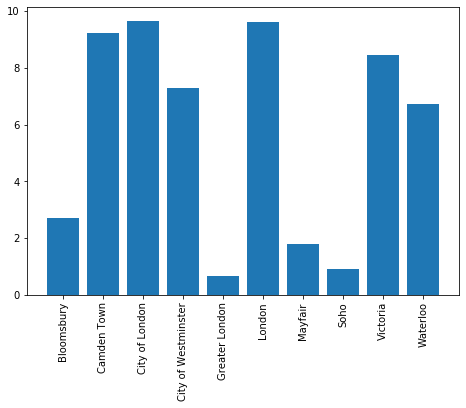

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = dataframe_top2['city']
y = dataframe_top2['rating']
plt.xticks(rotation = 90)
#dataframe_top2.plot.bar(x=1, y=10)
ax.bar(x, y)

<BarContainer object of 13 artists>

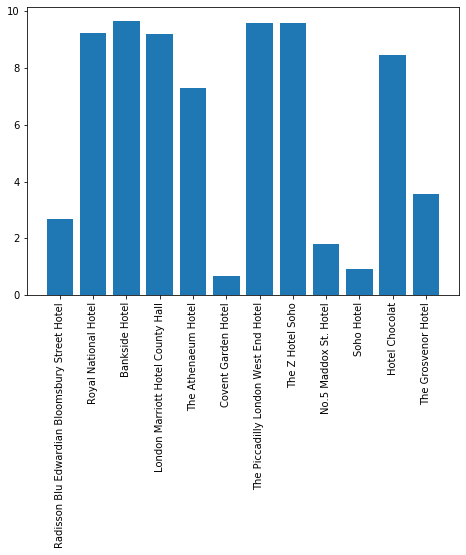

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = dataframe_top2['name']
y = dataframe_top2['rating']
plt.xticks(rotation = 90)
#dataframe_top2.plot.bar(x=1, y=10)
    
ax.bar(x, y)

### F. For the purpose of suggesting places to the customer, I am considering City of London and City of Westminister from the above result.
#### City of London includes - London, Greater London (for the simplicity of my research). Similarly Soho, Victoria and Westminster are par of City of Westminster

In [22]:
## Steps to perform the grouping as mentioned above
def city_main(cm):
    if cm['city'] in 'London':
        return 'City of London'
    if cm['city'] in 'Greater London':
        return 'City of London'
    if cm['city'] in 'City of London':
        return 'City of London'
    if cm['city'] in 'Soho':
        return 'Westminster'
    if cm['city'] in 'Victoria':
        return 'Westminster'
    if cm['city'] in 'Westminster':
        return 'Westminster'
    else:
        return 'Other'

dataframe_top2['city_main']=dataframe_top2.apply(city_main, axis=1)

In [23]:
dataframe_top2

,index,name,categories,address,lat,lng,postalCode,city,id,rating,total_likes,city_main
0,18,Radisson Blu Edwardian Bloomsbury Street Hotel,Hotel,"9-13 Bloomsbury St, Bloomsbury",51.517488,-0.127685,WC1B 3QD,Bloomsbury,4b8cd1ebf964a52012de32e3,2.70,157,Other
1,44,Royal National Hotel,Hotel,38-51 Bedford Way,51.523594,-0.127534,WC1H 0AP,Camden Town,4b4756c6f964a520432f26e3,9.24,191,Other
2,42,Bankside Hotel,Hotel,"2 Blackfriars Road, Upper Ground",51.507926,-0.104769,SE1 9JU,City of London,5bcfc17f894eac002cc5b61f,9.66,196,City of London
3,1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3,9.20,187,City of London
4,31,The Athenaeum‬‪‬‪‬ Hotel,Hotel,116 Piccadilly,51.504589,-0.147353,W1J 7BJ,City of Westminster,4ac51183f964a52045a020e3,7.30,198,Other
5,19,Covent Garden Hotel,Hotel,10 Monmouth St,51.514509,-0.126910,WC2H 9HB,Greater London,4ac518b5f964a520aea020e3,0.66,185,City of London
6,16,The Piccadilly London West End Hotel,Hotel,65 Shaftsbury Ave,51.512156,-0.131767,W1D 6EX,London,564c9b99498ec148d934dede,9.60,198,City of London
7,17,The Z Hotel Soho,Hotel,17 Moor St,51.513614,-0.129795,W1D 5AP,London,4eb8731f30f8d0f18da0e82e,9.57,172,City of London
8,40,No.5 Maddox St. Hotel,Hotel,5 Maddox St.,51.513453,-0.141395,W1S 2QD,Mayfair,4d57c3e6d1a08cfaa23907ba,1.80,199,Other
9,21,Soho Hotel,Hotel,4 Richmond Mews,51.514063,-0.133851,W1D 3DH,Soho,4ac518b8f964a5206ba120e3,0.93,181,Westminster


## 3. Places of interest across London

## 3. Places of interest across London

### A. Let's now dive into the next dataset that has the information on different places in the city of London

In [24]:
df_london = pd.read_csv("all_sites.csv", delimiter=",")
df_london.head(1)

,BOROUGH,Cultural_Venue_Type,additional_contact_name,address1,address2,address3,alternativenames,borough_code,borough_name,building_name,...,rm_organisation_name,runtime,site_name,ward,ward_2018_code,ward_2018_name,ward_code,ward_code_2018,ward_name_2018,website
0,Tower Hamlets,Archives,NaN,Thomson Reuters,30 South Colonnade,Canary Wharf,NaN,E09000030,Tower Hamlets,NaN,...,NaN,4/20/2020,Reuters Archive,NaN,E05009323,Canary Wharf,NaN,NaN,NaN,https://reuters.screenocean.com/


### B. Clean the dataset by removing the unwanted columns

In [25]:
df_london_clean = df_london.drop(['fid_london_ward','address1', 'address2', 'address3','additional_contact_name', 'alternativenames', 'borough_code', 'building_name', 'contact_name', 'easting', 'greenflagcommunityaward', 'gss_code', 'northing', 'os_addressbase_uprn', 'rm_organisation_name', 'runtime', 'ward', 'ward_2018_code', 'ward_2018_name', 'ward_code', 'ward_code_2018', 'ward_name_2018'], axis = 1)
df_london_clean.head()                                  

,BOROUGH,Cultural_Venue_Type,borough_name,latitude,longitude,site_name,website
0,Tower Hamlets,Archives,Tower Hamlets,51.504351,-0.020429,Reuters Archive,https://reuters.screenocean.com/
1,Tower Hamlets,Archives,Tower Hamlets,51.516148,-0.070465,Whitechapel Art Gallery,https://www.whitechapelgallery.org/
2,Tower Hamlets,Archives,Tower Hamlets,51.520200,-0.078467,Society for the Protection of Ancient Buildings,https://www.spab.org.uk/
3,Tower Hamlets,Archives,Tower Hamlets,51.517091,-0.070959,Lasa,http://www.lasa.org.uk/
4,Tower Hamlets,Archives,Tower Hamlets,51.510613,-0.066938,Wilton's Music Hall,https://www.wiltons.org.uk/


### C. Get the total number of places of interest for Westminster and City of London

In [26]:
places = pd.value_counts(df_london_clean['BOROUGH'])
df_places = pd.DataFrame(places)
df_places

,BOROUGH
Westminster,1182
Camden,892
Hackney,683
Islington,577
Southwark,535
Tower Hamlets,514
Lambeth,512
City of London,340
Wandsworth,301
Lewisham,293


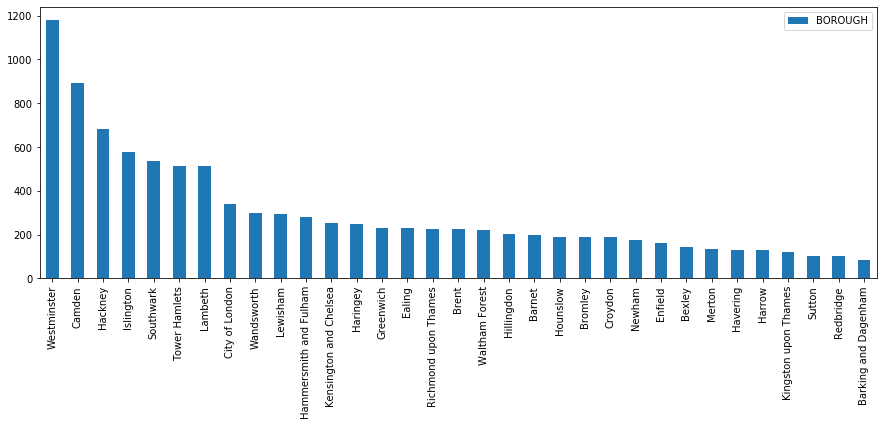

In [27]:
df_places.plot(kind='bar', figsize=(15, 5))

#### Looking at the above plot, the area of "City of Westminster" has the highest number of places to visit, while City of London is at the 8th position

<h3> Let us now create a dataset that holds the important places of interest from the City of Westminster

In [28]:
options = ['Westminster']
df_westminster = df_london_clean.loc[df_london_clean['BOROUGH'].isin(options)]
df_westminster.head()

,BOROUGH,Cultural_Venue_Type,borough_name,latitude,longitude,site_name,website
381,Westminster,Archives,City of Westminster,51.509947,-0.142553,Royal Institution of Great Britain,http://www.rigb.org/
382,Westminster,Archives,City of Westminster,51.501203,-0.129956,Institution of Mechanical Engineers Archive,https://www.imeche.org/libraries-archive/archi...
383,Westminster,Archives,City of Westminster,51.498758,-0.143009,Girlguiding UK,https://www.girlguiding.org.uk/
384,Westminster,Archives,City of Westminster,51.510609,-0.128202,The Theatres Trust Resource Centre,NaN
385,Westminster,Archives,City of Westminster,51.495706,-0.128063,National Institute of Economic and Social Rese...,https://www.niesr.ac.uk/


<h3> Create a dataset with hotels from Westminster alone based on our initial dataset of hotels created with Foursquare API

In [30]:
hotel_options = ['Westminster']
df_westminster_hotels = dataframe_top2.loc[dataframe_top2['city_main'].isin(hotel_options)]
df_westminster_hotels.head()

,index,name,categories,address,lat,lng,postalCode,city,id,rating,total_likes,city_main
9,21,Soho Hotel,Hotel,4 Richmond Mews,51.514063,-0.133851,W1D 3DH,Soho,4ac518b8f964a5206ba120e3,0.93,181,Westminster
10,46,Hotel Chocolat,Chocolate Shop,133 Victoria St,51.497072,-0.138848,SW1E 6RD,Victoria,4acdd801f964a52036cd20e3,8.46,181,Westminster
11,26,The Grosvenor Hotel,Hotel,101 Buckingham Palace Rd,51.495652,-0.145511,SW1W 0SJ,Victoria,4ac518b4f964a52084a020e3,3.56,151,Westminster


In [31]:
latitude = 51.5145
longitude = -0.1595

venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13)

"""folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='The Grosvenor Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1) """

# add a red circle marker to represent the 3 hotels from Westminster

for lat, lng, label in zip(df_westminster_hotels.lat, df_westminster_hotels.lng, df_westminster_hotels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map1)

for lat, lng, label in zip(df_westminster.latitude, df_westminster.longitude, df_westminster.Cultural_Venue_Type):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# generate map centred around The Grosvenor Hotel which has the highest rating in Westminster

venues_map1

### Like it is done for Westminster, below line of codes, generates a map with areas of interest around the main city of London

In [32]:
options = ['City of London']
df_london1 = df_london_clean.loc[df_london_clean['BOROUGH'].isin(options)]
df_london1.head()

,BOROUGH,Cultural_Venue_Type,borough_name,latitude,longitude,site_name,website
143,City of London,Archives,City and County of th,51.515517,-0.089226,Baring Archive,https://www.baringarchive.org.uk/
144,City of London,Archives,City and County of th,51.516313,-0.111522,LexisNexis Butterworths,https://store.lexisnexis.co.uk/categories/butt...
145,City of London,Archives,City and County of th,51.515068,-0.075887,Employment Policy Institute,NaN
146,City of London,Archives,City and County of th,51.510391,-0.089040,Prudential Group Archives,https://www.prudential.co.uk/about-us/our-hist...
147,City of London,Archives,City and County of th,51.515205,-0.110328,Chartered Insitute of Taxation,https://www.tax.org.uk/homepage


In [33]:
hotel_options = ['City of London']
df_london_hotels = dataframe_top2.loc[dataframe_top2['city_main'].isin(hotel_options)]
df_london_hotels.head()

,index,name,categories,address,lat,lng,postalCode,city,id,rating,total_likes,city_main
2,42,Bankside Hotel,Hotel,"2 Blackfriars Road, Upper Ground",51.507926,-0.104769,SE1 9JU,City of London,5bcfc17f894eac002cc5b61f,9.66,196,City of London
3,1,London Marriott Hotel County Hall,Hotel,"London County Hall, Westminster Bridge Road",51.501053,-0.119174,SE1 7PB,City of London,4ac518b6f964a52002a120e3,9.20,187,City of London
5,19,Covent Garden Hotel,Hotel,10 Monmouth St,51.514509,-0.126910,WC2H 9HB,Greater London,4ac518b5f964a520aea020e3,0.66,185,City of London
6,16,The Piccadilly London West End Hotel,Hotel,65 Shaftsbury Ave,51.512156,-0.131767,W1D 6EX,London,564c9b99498ec148d934dede,9.60,198,City of London
7,17,The Z Hotel Soho,Hotel,17 Moor St,51.513614,-0.129795,W1D 5AP,London,4eb8731f30f8d0f18da0e82e,9.57,172,City of London


In [34]:
latitude = 51.5074
longitude = -0.1278

venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent all the hotels from the City of London

for lat, lng, label in zip(df_london_hotels.lat, df_london_hotels.lng, df_london_hotels.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map2)

for lat, lng, label in zip(df_london1.latitude, df_london1.longitude, df_london1.Cultural_Venue_Type):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

# generate map centred around hotels showing the other areas of interest

venues_map2

<a id="item3"></a>

<a id="item5"></a>

<a id="item6"></a>